In [2]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 1.7 MB/s eta 0:00:00a 0:00:01


In [1]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [24]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']


In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.92      0.72      0.81      1000
  automobile       0.56      0.99      0.72      1000
        bird       0.88      0.77      0.82      1000
         cat       0.72      0.77      0.75      1000
        deer       0.85      0.85      0.85      1000
         dog       0.80      0.80      0.80      1000
        frog       0.85      0.93      0.89      1000
       horse       0.97      0.77      0.86      1000
        ship       0.96      0.83      0.89      1000
       truck       0.95      0.73      0.83      1000

    accuracy                           0.82     10000
   macro avg       0.85      0.82      0.82     10000
weighted avg       0.85      0.82      0.82     10000



## For the results graph

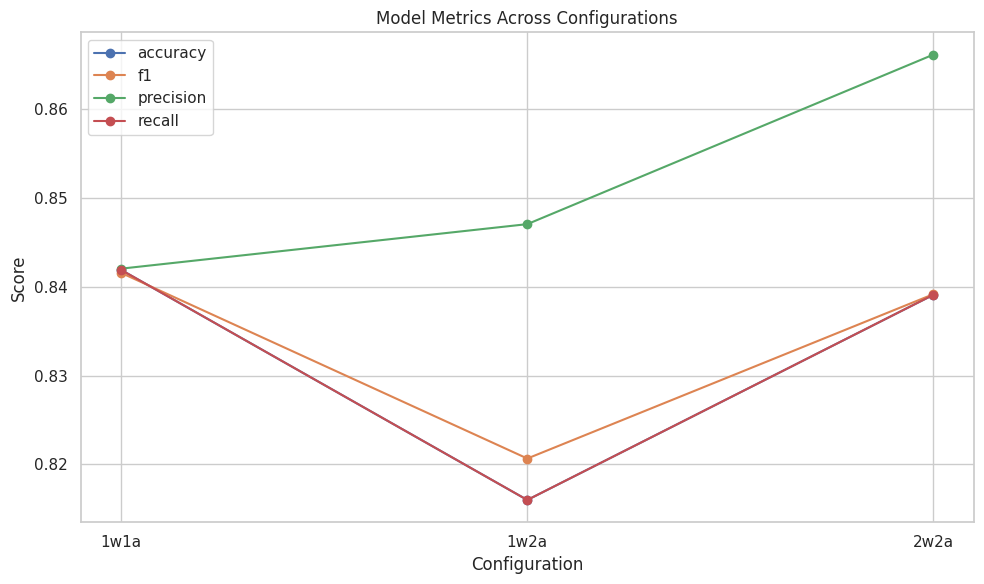

/tmp/ipykernel_141/647219457.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(all_throughputs.keys()), y=list(all_throughputs.values()), palette="Blues_d")


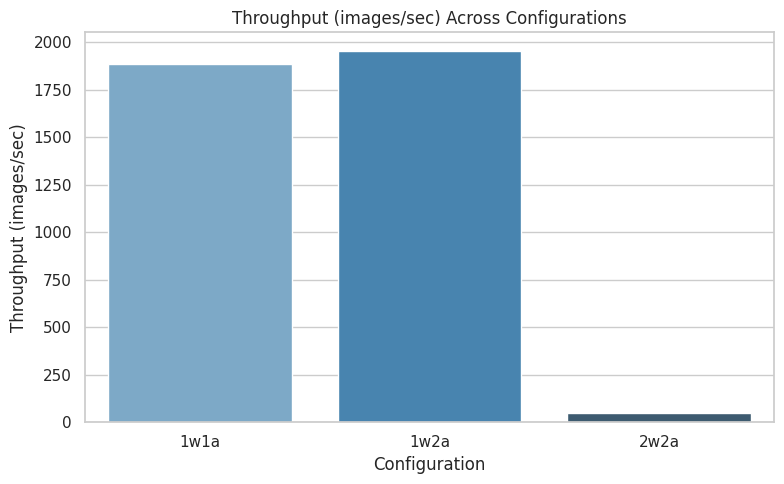

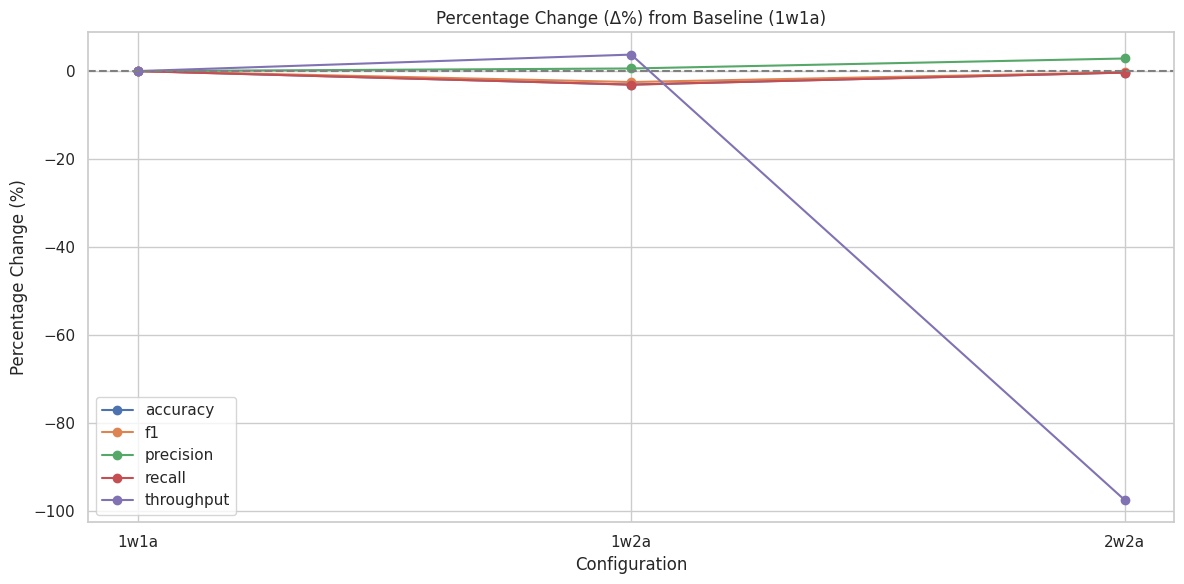

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

configs = ['1w1a', '1w2a', '2w2a']
metric_names = ['accuracy', 'f1', 'precision', 'recall']
throughput_key = 'throughput[images/s]'

# Dictionaries to hold data
all_metrics = {}
all_throughputs = {}

# Load all data
for config in configs:
    # Load raw predictions
    pred_data = np.load(f'metrics_{config}.npy', allow_pickle=True).item()
    y_true = pred_data['true_labels']
    y_pred = pred_data['predictions']

    # Compute metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')

    all_metrics[config] = {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

    # Load throughput
    throughput_data = np.load(f'throughput_{config}.npy', allow_pickle=True).item()
    throughput_val = throughput_data['throughput'][throughput_key]
    all_throughputs[config] = throughput_val

# === Plot Combined Metrics ===
plt.figure(figsize=(10, 6))
for metric in metric_names:
    vals = [all_metrics[c][metric] for c in configs]
    plt.plot(configs, vals, marker='o', label=metric)
plt.title("Model Metrics Across Configurations")
plt.ylabel("Score")
plt.xlabel("Configuration")
plt.legend()
plt.tight_layout()
plt.savefig("combined_metrics.png")
plt.show()

# === Plot Throughput ===
plt.figure(figsize=(8, 5))
sns.barplot(x=list(all_throughputs.keys()), y=list(all_throughputs.values()), palette="Blues_d")
plt.title("Throughput (images/sec) Across Configurations")
plt.ylabel("Throughput (images/sec)")
plt.xlabel("Configuration")
plt.tight_layout()
plt.savefig("combined_throughput.png")
plt.show()

# === Plot Delta Graph (percentage change relative to baseline) ===
baseline = configs[0]

plt.figure(figsize=(12, 6))

# Calculate deltas for metrics
for metric in metric_names:
    baseline_val = all_metrics[baseline][metric]
    delta = [100 * (all_metrics[c][metric] - baseline_val) / baseline_val for c in configs]
    plt.plot(configs, delta, marker='o', label=metric)

# Calculate delta for throughput
base_throughput = all_throughputs[baseline]
throughput_delta = [100 * (all_throughputs[c] - base_throughput) / base_throughput for c in configs]
plt.plot(configs, throughput_delta, marker='o', label='throughput')

plt.axhline(0, color='gray', linestyle='--')
plt.title("Percentage Change (Δ%) from Baseline (1w1a)")
plt.ylabel("Percentage Change (%)")
plt.xlabel("Configuration")
plt.legend()
plt.tight_layout()
plt.savefig("delta_metrics_throughput.png")
plt.show()


## 2x2 graph

/tmp/ipykernel_141/263218660.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=configs, y=values, palette="viridis", ax=axs[i])
/tmp/ipykernel_141/263218660.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=configs, y=values, palette="viridis", ax=axs[i])
/tmp/ipykernel_141/263218660.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=configs, y=values, palette="viridis", ax=axs[i])
/tmp/ipykernel_141/263218660.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

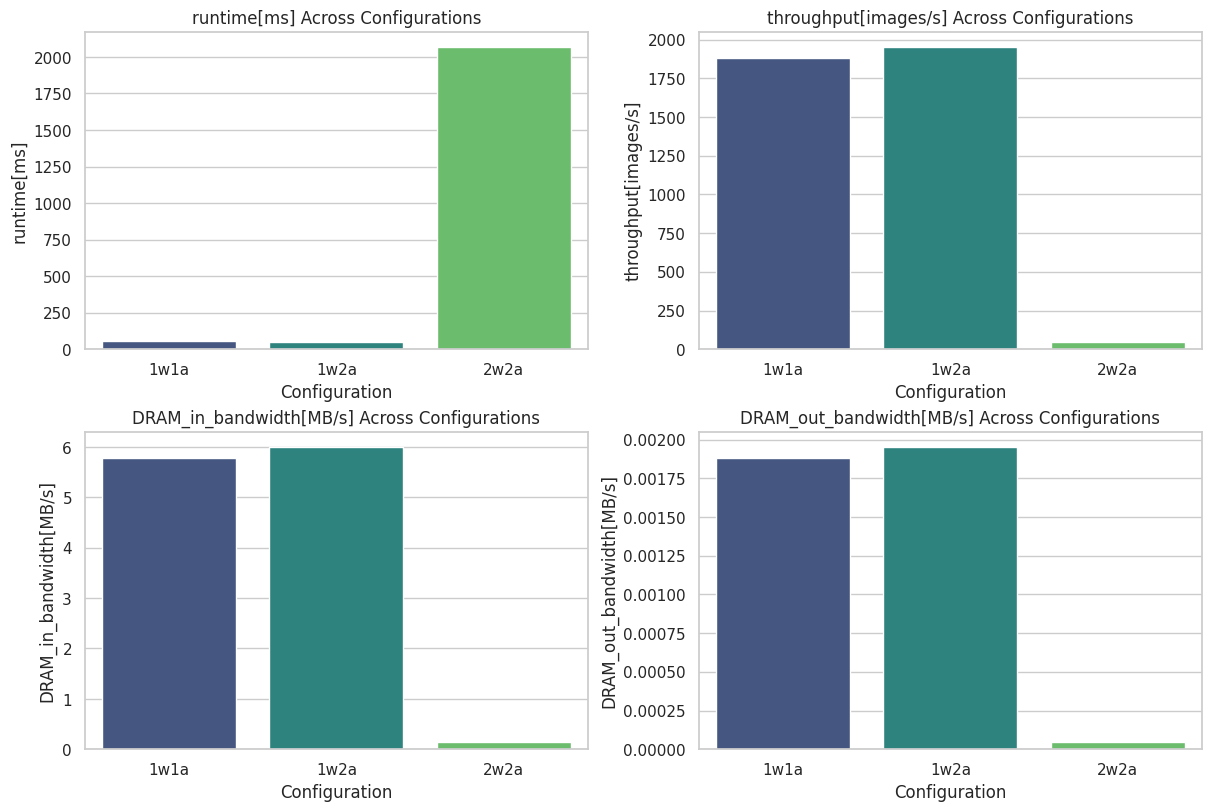

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

configs = ['1w1a', '1w2a', '2w2a']
throughput_data = {}

for config in configs:
    data = np.load(f'throughput_{config}.npy', allow_pickle=True).item()
    throughput_data[config] = data['throughput']

keys_to_show = [
    'runtime[ms]',
    'throughput[images/s]',
    'DRAM_in_bandwidth[MB/s]',
    'DRAM_out_bandwidth[MB/s]'
]

fig, axs = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)
axs = axs.flatten()

for i, key in enumerate(keys_to_show):
    values = [throughput_data[c][key] for c in configs]
    sns.barplot(x=configs, y=values, palette="viridis", ax=axs[i])
    axs[i].set_title(f"{key} Across Configurations")
    axs[i].set_ylabel(key)
    axs[i].set_xlabel("Configuration")

plt.savefig("throughput_metrics_2x2grid.png", dpi=300)
plt.show()


# FPGA Resources 

In [67]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt

# Constants for available resources on PYNQ-Z2 (Zynq-7020)
PYNQ_Z2_RESOURCES = {
    "Total LUTs": 53200,
    "Logic LUTs": 53200,
    "LUTRAMs": 17400,
    "SRLs": 17400,
    "FFs": 106400,
    "RAMB36": 140,
    "RAMB18": 280,
    "DSP Blocks": 220,
}

NUMERIC_COLUMNS = list(PYNQ_Z2_RESOURCES.keys())

def parse_vivado_utilization_xml(xml_file_path):
    tree = ET.parse(xml_file_path)
    root = tree.getroot()
    parsed_data = []
    column_headers = []
    utilization_table_element = None

    for section_element in root.findall(".//section[@title='Utilization by Hierarchy']"):
        table_candidate = section_element.find("table")
        if table_candidate is not None:
            utilization_table_element = table_candidate
            break

    if utilization_table_element is None:
        raise ValueError("Utilization table not found.")

    is_first_row = True
    for table_row_element in utilization_table_element.findall("tablerow"):
        current_row_cells = [cell.get("contents", "").strip() for cell in table_row_element]
        if is_first_row:
            column_headers = current_row_cells
            is_first_row = False
        else:
            if len(current_row_cells) == len(column_headers):
                parsed_data.append(current_row_cells)

    df = pd.DataFrame(parsed_data, columns=column_headers)

    for col_name in NUMERIC_COLUMNS:
        if col_name in df.columns:
            df[col_name] = pd.to_numeric(df[col_name], errors='coerce').fillna(0).astype(int)

    return df

def summarize_resource_usage(df):
    summary = {
        "Resource": [],
        "Used": [],
        "Available": [],
        "Utilization (%)": []
    }

    top = df.iloc[0]  # assuming top-level row contains totals

    for resource in NUMERIC_COLUMNS:
        used = int(top.get(resource, 0))
        available = PYNQ_Z2_RESOURCES[resource]
        summary["Resource"].append(resource)
        summary["Used"].append(used)
        summary["Available"].append(available)
        summary["Utilization (%)"].append(round((used / available) * 100, 2))

    return pd.DataFrame(summary)

def plot_resource_utilization(summary_df):
    fig, axs = plt.subplots(2, 1, figsize=(10, 8))

    axs[0].bar(summary_df["Resource"], summary_df["Used"], label="Used", alpha=0.7)
    axs[0].bar(summary_df["Resource"], summary_df["Available"], label="Available", alpha=0.3)
    axs[0].set_title("Used vs Available FPGA Resources")
    axs[0].set_ylabel("Count")
    axs[0].legend()
    axs[0].tick_params(axis='x', rotation=45)

    axs[1].bar(summary_df["Resource"], summary_df["Utilization (%)"], color="green")
    axs[1].set_title("FPGA Resource Utilization (%)")
    axs[1].set_ylabel("Utilization (%)")
    axs[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

def analyze_vivado_resources(xml_file_path):
    df = parse_vivado_utilization_xml(xml_file_path)
    summary_df = summarize_resource_usage(df)
    print (f"Summary for {xml_file_path}")
    print(summary_df.to_string(index=False))
    #plot_resource_utilization(summary_df)

# Example usage:
analyze_vivado_resources("synth_report_1w1a.xml")
print("\n")
analyze_vivado_resources("synth_report_1w2a.xml")
print("\n")
analyze_vivado_resources("synth_report_2w2a.xml")


Summary for synth_report_1w1a.xml
  Resource  Used  Available  Utilization (%)
Total LUTs 25465      53200            47.87
Logic LUTs 23430      53200            44.04
   LUTRAMs  1046      17400             6.01
      SRLs   989      17400             5.68
       FFs 31599     106400            29.70
    RAMB36    93        140            66.43
    RAMB18    13        280             4.64
DSP Blocks     0        220             0.00


Summary for synth_report_1w2a.xml
  Resource  Used  Available  Utilization (%)
Total LUTs 38786      53200            72.91
Logic LUTs 35519      53200            66.77
   LUTRAMs  1766      17400            10.15
      SRLs  1501      17400             8.63
       FFs 43105     106400            40.51
    RAMB36    87        140            62.14
    RAMB18    16        280             5.71
DSP Blocks     0        220             0.00


Summary for synth_report_2w2a.xml
  Resource  Used  Available  Utilization (%)
Total LUTs 27652      53200            

In [2]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
t1 = np.load("throughput_1w1a.npy", allow_pickle=True)

In [5]:
import matplotlib.pyplot as plt
import numpy as np

configs = ['1w1a', '1w2a', '2w2a']
throughput_data = {}

for config in configs:
    data = np.load(f'throughput_{config}.npy', allow_pickle=True).item()
    throughput_data[config] = data['throughput']

keys_to_show = [
    'runtime[ms]',
    'throughput[images/s]',
    'DRAM_in_bandwidth[MB/s]',
    'DRAM_out_bandwidth[MB/s]'
]

In [6]:
throughput_data

{'1w1a': {'runtime[ms]': 53.108930587768555,
  'throughput[images/s]': 1882.92249332226,
  'DRAM_in_bandwidth[MB/s]': 5.7843378994859815,
  'DRAM_out_bandwidth[MB/s]': 0.0018829224933222598,
  'fclk[mhz]': 100.0,
  'batch_size': 100,
  'fold_input[ms]': 0.1327991485595703,
  'pack_input[ms]': 0.09179115295410156,
  'copy_input_data_to_device[ms]': 2.475738525390625,
  'copy_output_data_from_device[ms]': 0.22101402282714844,
  'unpack_output[ms]': 0.8840560913085938,
  'unfold_output[ms]': 0.15044212341308594},
 '1w2a': {'runtime[ms]': 51.191091537475586,
  'throughput[images/s]': 1953.4648900149502,
  'DRAM_in_bandwidth[MB/s]': 6.001044142125927,
  'DRAM_out_bandwidth[MB/s]': 0.00195346489001495,
  'fclk[mhz]': 100.0,
  'batch_size': 100,
  'fold_input[ms]': 0.13184547424316406,
  'pack_input[ms]': 0.09298324584960938,
  'copy_input_data_to_device[ms]': 2.366781234741211,
  'copy_output_data_from_device[ms]': 0.22172927856445312,
  'unpack_output[ms]': 0.8616447448730469,
  'unfold_out

In [7]:

# Define resource power constants in µW/MHz
POWER_COEFFICIENTS = {
    'LUT': 8,
    'FF': 2,
    'BRAM36': 30,
    'BRAM18': 15,
    'DSP': 12
}

# Assumed operating frequency (MHz)
FREQUENCY = 100

# Throughput estimates (images/second) — adjust as needed
THROUGHPUTS = {
    "synth_report_1w1a.xml": 1882.92,
    "synth_report_1w2a.xml": 1953.46,
    "synth_report_2w2a.xml": 48.33,
}

def parse_utilization(xml_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()

    for row in root.iter('tablerow'):
        cells = [cell.attrib['contents'] for cell in row.findall('tablecell')]
        if cells and cells[0].strip() == "top_wrapper":
            return {
                'LUT': int(cells[2]),
                'FF': int(cells[6]),
                'BRAM36': int(cells[7]),
                'BRAM18': int(cells[8]),
                'DSP': int(cells[9])
            }
    return {}

def estimate_power_and_energy(files):
    results = []

    for label, path in files.items():
        utilization = parse_utilization(path)
        if not utilization:
            continue

        power_uW = (
            utilization['LUT'] * POWER_COEFFICIENTS['LUT'] +
            utilization['FF'] * POWER_COEFFICIENTS['FF'] +
            utilization['BRAM36'] * POWER_COEFFICIENTS['BRAM36'] +
            utilization['BRAM18'] * POWER_COEFFICIENTS['BRAM18'] +
            utilization['DSP'] * POWER_COEFFICIENTS['DSP']
        ) * FREQUENCY

        power_mW = power_uW / 1000
        throughput = THROUGHPUTS[label]
        energy_per_inference_mJ = power_mW / throughput

        results.append({
            "Model": label.replace("synth_report_", "").replace(".xml", ""),
            "Power (mW)": round(power_mW, 2),
            "Throughput (img/s)": throughput,
            "Energy per Inference (mJ)": round(energy_per_inference_mJ, 4)
        })

    return pd.DataFrame(results)

if __name__ == "__main__":
    files = {
        "synth_report_1w1a.xml": "synth_report_1w1a.xml",
        "synth_report_1w2a.xml": "synth_report_1w2a.xml",
        "synth_report_2w2a.xml": "synth_report_2w2a.xml"
    }

    df = estimate_power_and_energy(files)
    print(df.to_string(index=False))

Model  Power (mW)  Throughput (img/s)  Energy per Inference (mJ)
 1w1a     26990.3             1882.92                    14.3343
 1w2a     39934.8             1953.46                    20.4431
 2w2a     29787.5               48.33                   616.3356
